In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns


In [5]:
file_path = r"C:\Users\ndon2\Downloads\Module 4 assignment\Car_sales.csv"
df = pd.read_csv(file_path)
df.head()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [25]:
df = df.dropna(subset=["Price_in_thousands"])
features = [
    "Engine_size", "Horsepower", "Wheelbase", "Width", "Length",
    "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor"
]

X = df[features]
y = df["Price_in_thousands"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 18.18
R² Score: 0.92


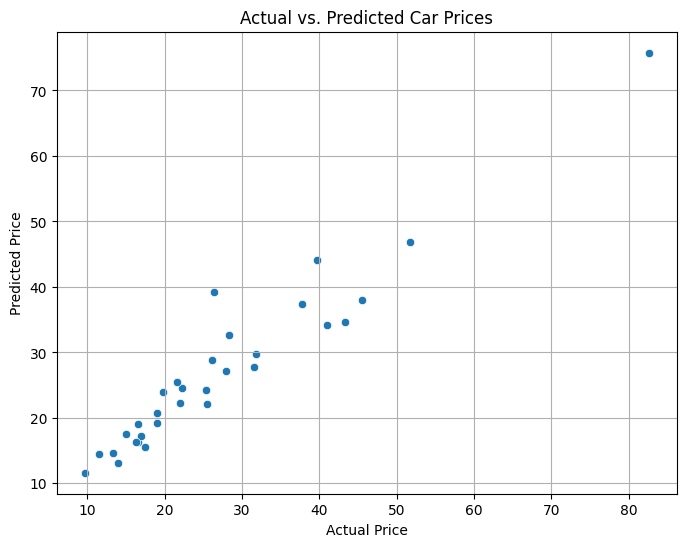

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.grid(True)
plt.show()


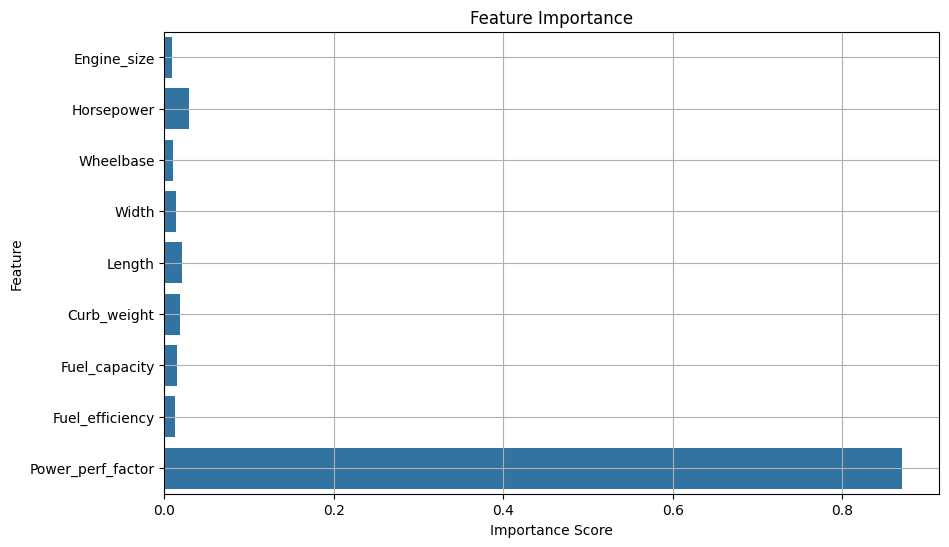

In [23]:
feature_importance = model.feature_importances_
feature_names = features

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [24]:
# Restore original X values for interpretation
X_test_df = pd.DataFrame(X_test, columns=features)
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Error": y_pred - y_test.values
})
results = results.join(X_test_df.reset_index(drop=True))
worst = results.reindex(results['Error'].abs().sort_values(ascending=False).index).head(5)
print(worst[["Actual", "Predicted", "Error"] + features])


    Actual  Predicted     Error  Engine_size  Horsepower  Wheelbase  Width  \
10   26.31   39.15589  12.84589          5.2       230.0      115.7   71.7   
13   43.33   34.65277  -8.67723          4.6       215.0      117.7   78.2   
8    45.50   37.97881  -7.52119          2.3       236.0      104.9   71.5   
26   41.00   34.14058  -6.85942          2.3       185.0       94.5   67.5   
6    82.60   75.76760  -6.83240          5.0       302.0       99.0   71.3   

    Length  Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  
10   193.5        4.394           25.0             17.0          92.854125  
13   215.3        4.121           19.0             21.0          93.957917  
8    185.7        3.601           18.5             23.0         101.623357  
26   157.3        2.975           14.0             27.0          81.848969  
6    177.1        4.125           21.1             20.0         139.982294  
